In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import os
import re

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
labelled_data = pd.read_csv("cleaned_labelled.csv")
labelled_data.head()

,tweet_id,text,airline_sentiment
0,570306133677760513,what said,average
1,570301130888122368,plus you ve added commercials to the experienc...,good
2,570301083672813571,i didn t today must mean i need to take anothe...,average
3,570301031407624196,it s really aggressive to blast obnoxious ente...,negative
4,570300817074462722,and it s a really big bad thing about it,worse


In [3]:
stopwords_set = stopwords.words('english')
LEMMER = WordNetLemmatizer() 
STEMMER=PorterStemmer()

def my_lemmer(input_string):
    words = re.sub(r"[^A-Za-z\-]", " ", input_string).lower().split()
    words = [LEMMER.lemmatize(word) for word in words if word not in stopwords_set]
    return words

def my_stemmer(input_string):
    words = re.sub(r"[^A-Za-z\-]", " ", input_string).lower().split()
    words = [STEMMER.stem(word) for word in words if word not in stopwords_set]
    return words

def my_stemmer_and_stop(input_string):
    words = re.sub(r"[^A-Za-z\-]", " ", input_string).lower().split()
    words = [STEMMER.stem(word) for word in words if word not in stopwords_set]
    return words

In [15]:
tfidf = CountVectorizer(input = "content", max_features=50, tokenizer = my_stemmer_and_stop, stop_words='english',ngram_range=(1,2))

In [16]:
tfidf_data = tfidf.fit_transform(labelled_data.text.values)

C:\Users\vatss\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  % sorted(inconsistent)


In [17]:
data_tfidf = pd.DataFrame(tfidf_data.toarray(),columns=tfidf.get_feature_names_out())
data_tfidf.head()

,agent,airlin,airport,amp,bag,board,book,cancel,cancel flight,cancel flightl,...,thank,ticket,time,today,travel,tri,u,wait,way,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# removing columns with names smaller than 2 characters

for col in data_tfidf.columns:
    if(re.search(r'[^A-Za-z]+', col)):
        print(col)
        data_tfidf=data_tfidf.drop([col], axis=1)
    elif len(str(col))<=2:
        print(col)
        data_tfidf=data_tfidf.drop([col], axis=1)

cancel flight
cancel flightl
custom servic
hr
u


In [19]:
data_tfidf_labelled = data_tfidf.copy()
data_tfidf_labelled['label'] = labelled_data['airline_sentiment']

In [20]:
data_tfidf_labelled.to_csv("arm_labelled.csv")

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labelled_data.airline_sentiment)

In [58]:
len(y)

14640

In [53]:
X = np.array(data_tfidf)

In [38]:
range_n_clusters = [2, 3, 4, 5, 6]

For n_clusters = 2 The average silhouette_score is : 0.8262709626901892
For n_clusters = 3 The average silhouette_score is : 0.9759391835918751
For n_clusters = 4 The average silhouette_score is : 0.9960583926678881
For n_clusters = 5 The average silhouette_score is : 0.9989658925365233
For n_clusters = 6 The average silhouette_score is : 0.9994856435439203


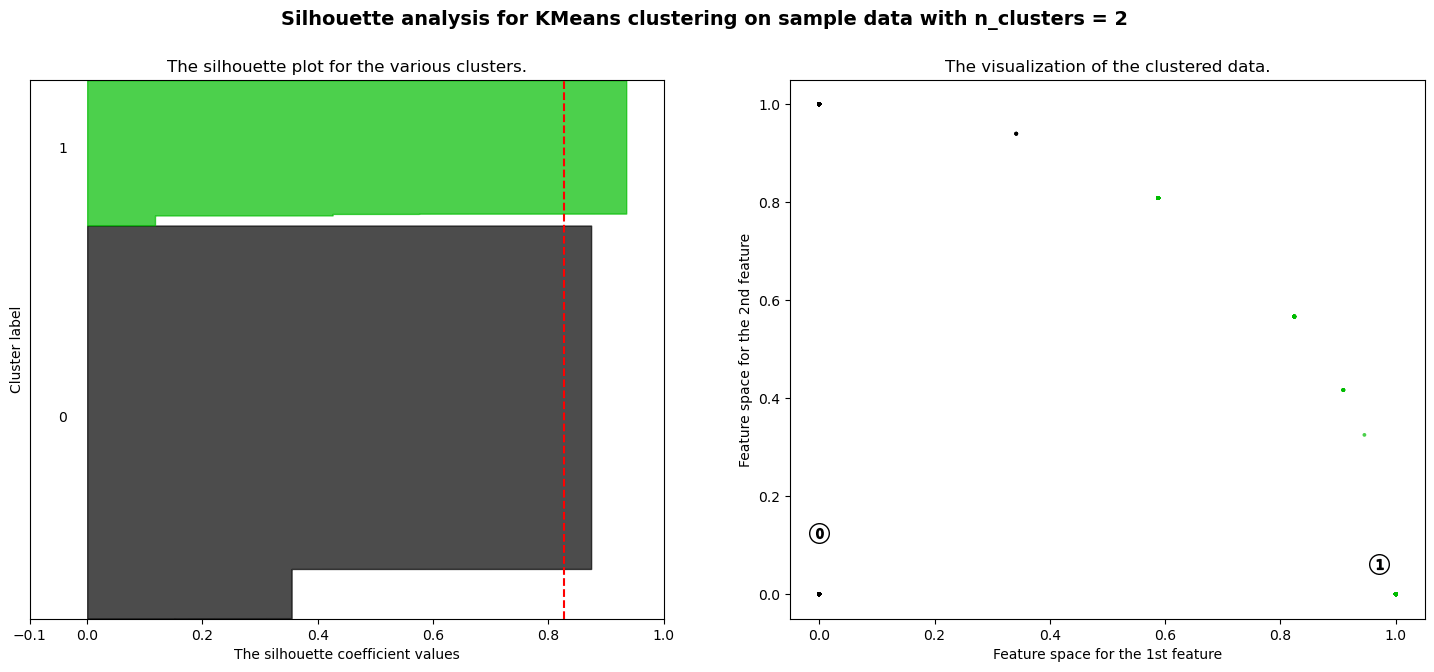

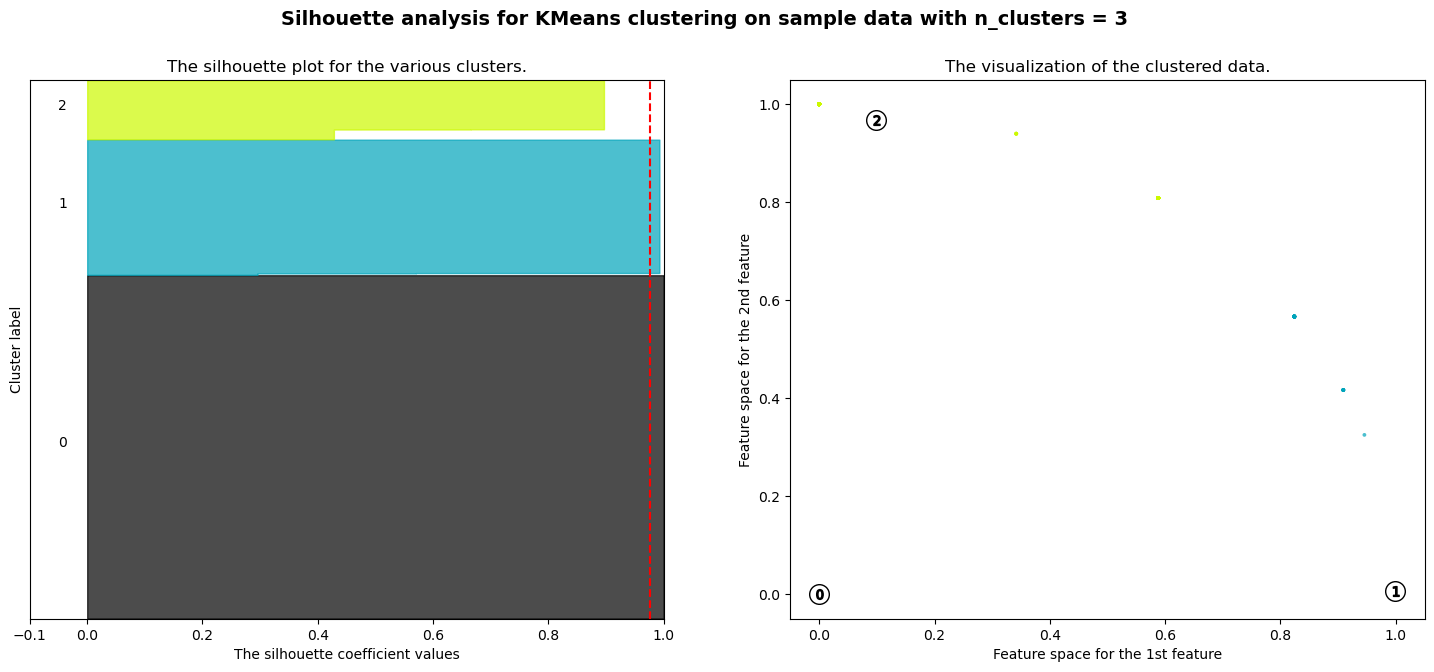

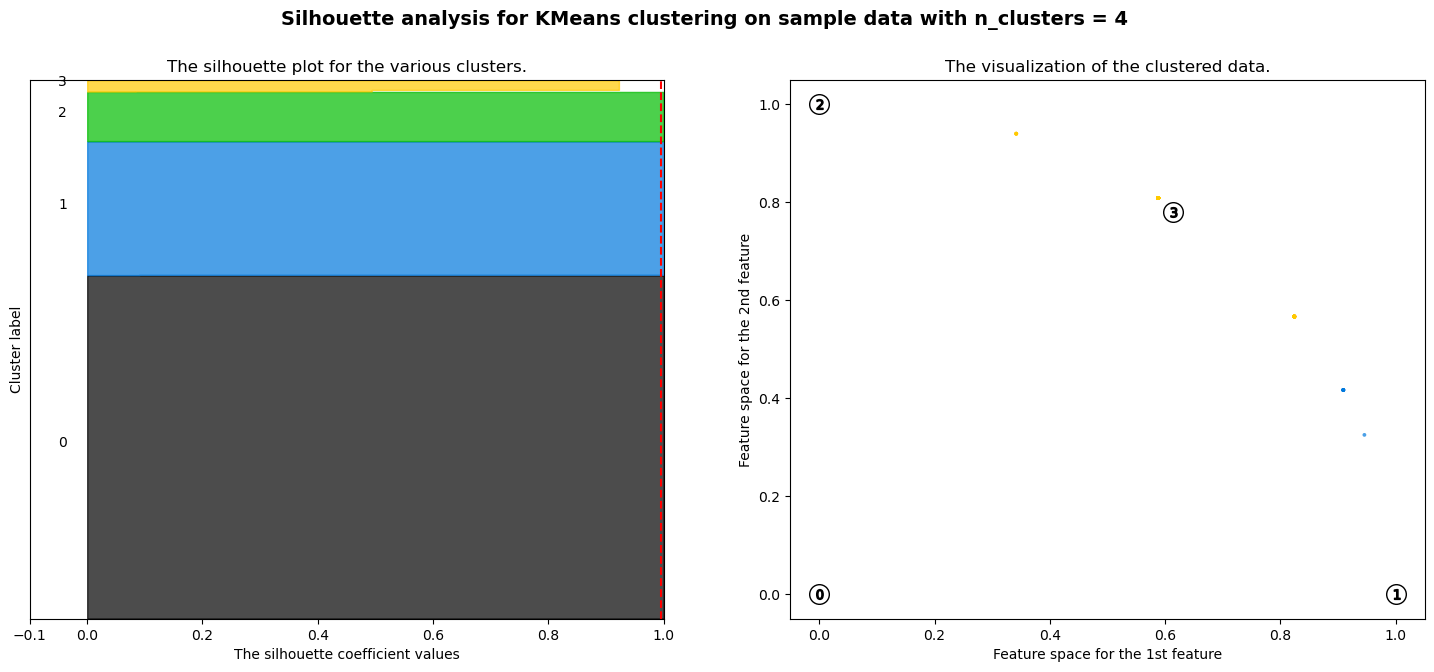

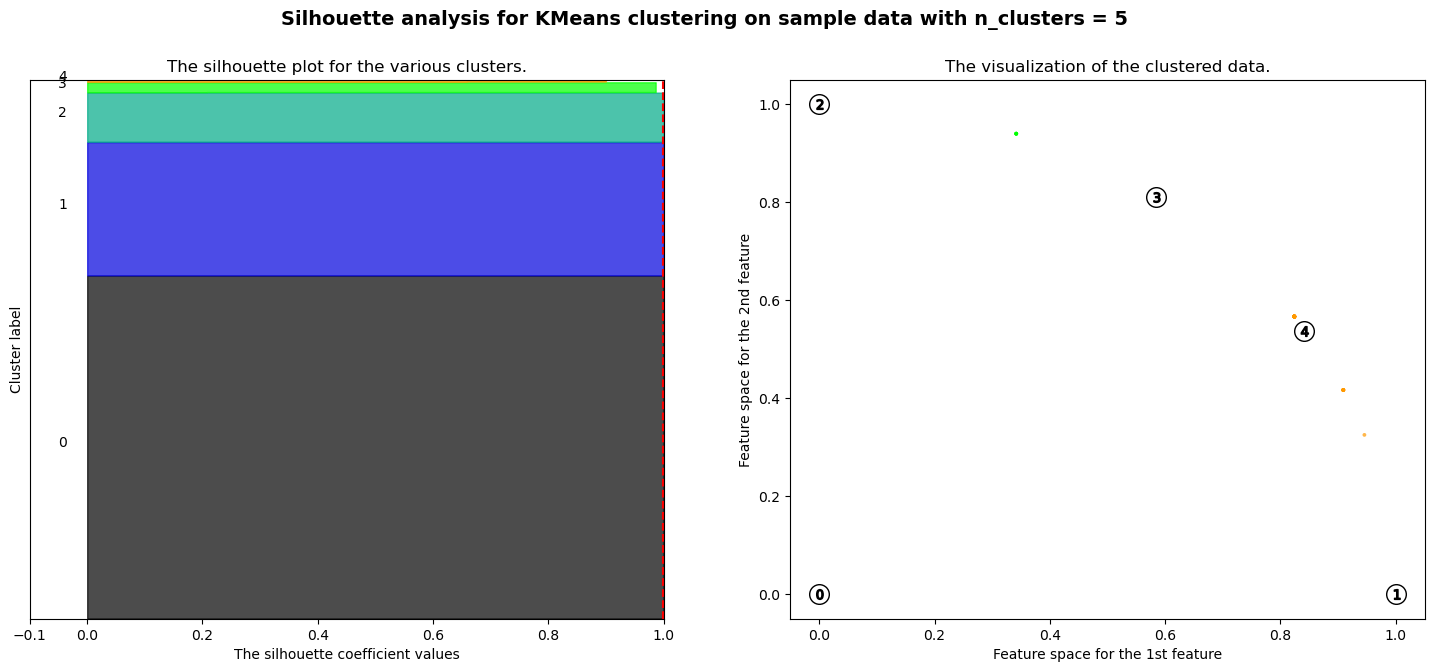

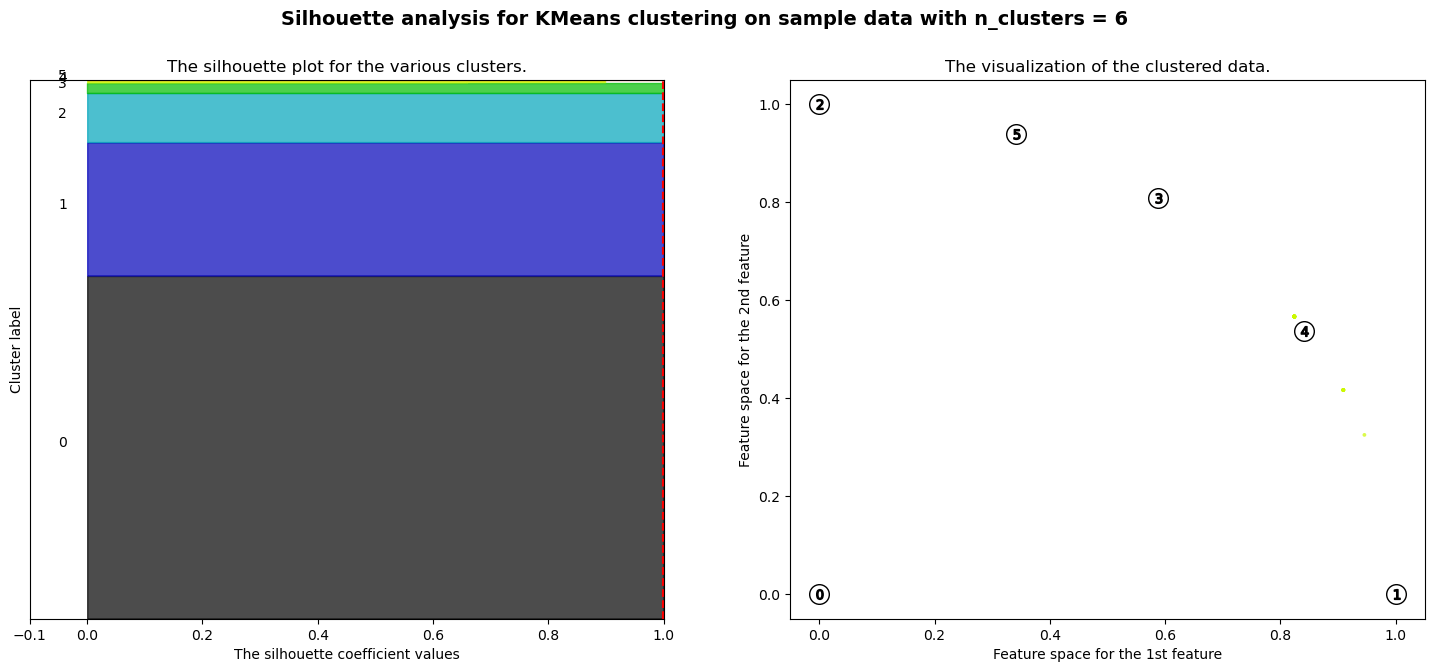

In [57]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()